In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Importing files
control_group=pd.read_csv('D:\PYTHON FOR DATA SCIENCE UDEMY COURSE MATERIALS\Projects\AB Testing\control_group.csv',sep=';')
test_group=pd.read_csv(r'D:\PYTHON FOR DATA SCIENCE UDEMY COURSE MATERIALS\Projects\AB Testing\test_group.csv', sep=';')

In [3]:
control_group

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [4]:
# Data Preparation & Cleaning of control_group Table

In [5]:
# Rename Columns
control_group.columns=control_group.columns.str.replace('#','')
control_group.columns=control_group.columns.str.replace('of','')
control_group.columns=control_group.columns.str.replace(' ','')
control_group.columns=control_group.columns.str.replace('Impressions','Number of Impressions')

In [6]:
# Check Missing Values in Table & Replace it with the Mean Value
control_group.fillna(control_group.loc[0:, 'Number of Impressions':'Purchase'].mean(), inplace=True)
control_group.isnull().sum()

CampaignName             0
Date                     0
Spend[USD]               0
Number of Impressions    0
Reach                    0
WebsiteClicks            0
Searches                 0
ViewContent              0
AddtoCart                0
Purchase                 0
dtype: int64

In [7]:
# View Table after Preparation
control_group

,CampaignName,Date,Spend[USD],Number of Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,Control Campaign,6.08.2019,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,Control Campaign,7.08.2019,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,Control Campaign,8.08.2019,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,Control Campaign,9.08.2019,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


In [11]:
# Data Preparation & Cleaning of test_group Table

In [13]:
# Rename Columns
test_group.columns=test_group.columns.str.replace('#','')
test_group.columns=test_group.columns.str.replace('of','')
test_group.columns=test_group.columns.str.replace(' ','')
test_group.columns=test_group.columns.str.replace('Impressions','Number of Impressions')

In [15]:
# Check Missing Values in Table
test_group.isnull().sum()

CampaignName             0
Date                     0
Spend[USD]               0
Number of Impressions    0
Reach                    0
WebsiteClicks            0
Searches                 0
ViewContent              0
AddtoCart                0
Purchase                 0
dtype: int64

In [16]:
# View Table after Preparation
test_group

,CampaignName,Date,Spend[USD],Number of Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [22]:
# Merge the Two Tables(control_group,test_group) and to be sorted by date
ab_data=control_group.merge(test_group, how='outer').sort_values(['Date'])
ab_data=ab_data.reset_index(drop=True)
ab_data

C:\Users\hb\AppData\Local\Temp\ipykernel_18860\1290768837.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data=control_group.merge(test_group, how='outer').sort_values(['Date'])


,CampaignName,Date,Spend[USD],Number of Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Test Campaign,1.08.2019,3008,39550.000000,35820.000000,3038.000000,1946.000000,1069.000000,894.0,255.000000
2,Test Campaign,10.08.2019,2790,95054.000000,79632.000000,8125.000000,2312.000000,1804.000000,424.0,275.000000
3,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000
4,Test Campaign,11.08.2019,2420,83633.000000,71286.000000,3750.000000,2893.000000,2617.000000,1075.0,668.000000
5,Control Campaign,11.08.2019,2490,115247.000000,95843.000000,8137.000000,2941.000000,2486.000000,1887.0,475.000000
6,Test Campaign,12.08.2019,2831,124591.000000,10598.000000,8264.000000,2081.000000,1992.000000,1382.0,709.000000
7,Control Campaign,12.08.2019,2319,116639.000000,100189.000000,2993.000000,1397.000000,1147.000000,1439.0,794.000000
8,Test Campaign,13.08.2019,1972,65827.000000,49531.000000,7568.000000,2213.000000,2058.000000,1391.0,812.000000
9,Control Campaign,13.08.2019,2697,82847.000000,68214.000000,6554.000000,2390.000000,1975.000000,1794.0,766.000000


In [23]:
# Check if both datasets have an equal number of samples about both campaigns
ab_data['CampaignName'].value_counts()

CampaignName
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64

In [24]:
ab_data

,CampaignName,Date,Spend[USD],Number of Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddtoCart,Purchase
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Test Campaign,1.08.2019,3008,39550.000000,35820.000000,3038.000000,1946.000000,1069.000000,894.0,255.000000
2,Test Campaign,10.08.2019,2790,95054.000000,79632.000000,8125.000000,2312.000000,1804.000000,424.0,275.000000
3,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000
4,Test Campaign,11.08.2019,2420,83633.000000,71286.000000,3750.000000,2893.000000,2617.000000,1075.0,668.000000
5,Control Campaign,11.08.2019,2490,115247.000000,95843.000000,8137.000000,2941.000000,2486.000000,1887.0,475.000000
6,Test Campaign,12.08.2019,2831,124591.000000,10598.000000,8264.000000,2081.000000,1992.000000,1382.0,709.000000
7,Control Campaign,12.08.2019,2319,116639.000000,100189.000000,2993.000000,1397.000000,1147.000000,1439.0,794.000000
8,Test Campaign,13.08.2019,1972,65827.000000,49531.000000,7568.000000,2213.000000,2058.000000,1391.0,812.000000
9,Control Campaign,13.08.2019,2697,82847.000000,68214.000000,6554.000000,2390.000000,1975.000000,1794.0,766.000000


In [ ]:
# Analyze Data

Text(0.5, 1.0, 'Control VS Test: Relation bet Amount Spent to Impressions')

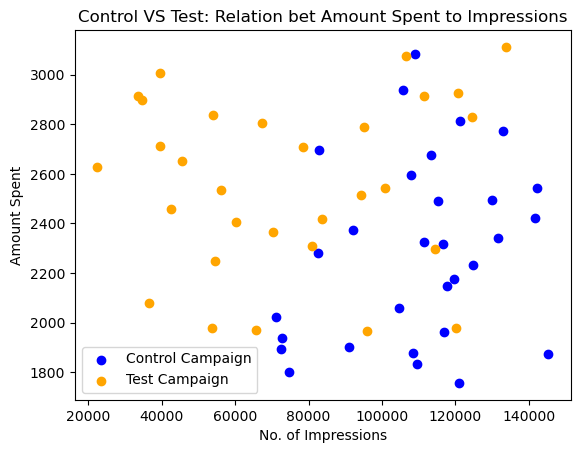

In [311]:
# Plot the two Groups(control_group & test_groups) in terms of ('Number of Impressions','Spend[USD]')
x1_axis=control_group['Number of Impressions']
y1_axis=control_group['Spend[USD]']
x2_axis=test_group['Number of Impressions']
y2_axis=test_group['Spend[USD]']

plt.scatter(x1_axis,y1_axis, c='b')
plt.scatter(x2_axis,y2_axis, c='orange')
plt.ylabel('Amount Spent')
plt.xlabel('No. of Impressions')
plt.legend(['Control Campaign','Test Campaign'])
plt.title('Control VS Test: Relation bet Amount Spent to Impressions')

([<matplotlib.patches.Wedge at 0x205c45e2790>,
 [Text(0.07354536121259235, 1.0975386461733863, 'Control Campaign'),
  Text(-0.07354546397157581, -1.0975386392875677, 'Test Campaign')],
 [Text(0.04011565157050491, 0.5986574433673015, '47.87'),
  Text(-0.040115707620859524, -0.5986574396114005, '52.13')])

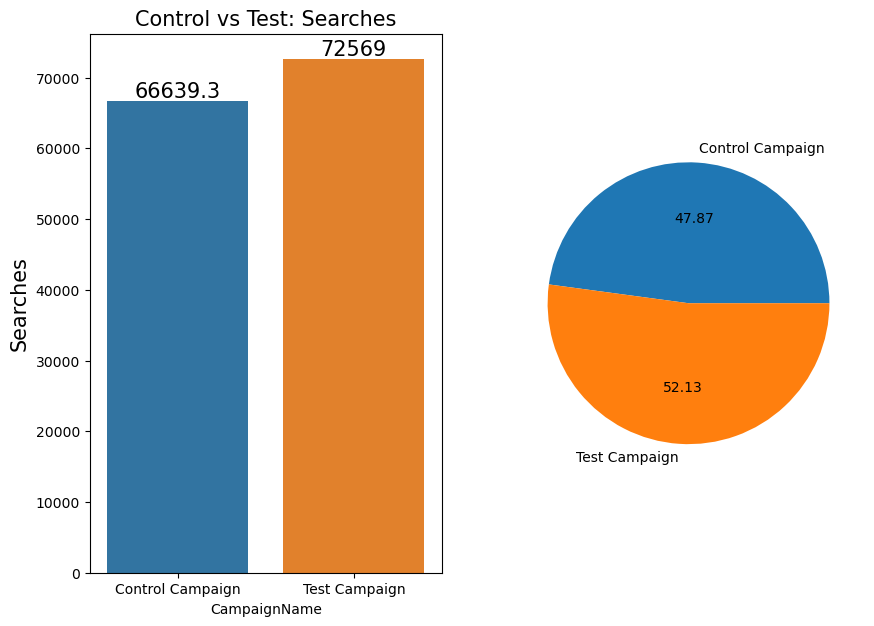

In [294]:
# let’s have a look at the number of searches performed on the website from both campaigns
group_searches_by_CampaignName=ab_data[['CampaignName','Searches']].groupby('CampaignName').sum()

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
searches_plot=sns.barplot(x=group_searches_by_CampaignName.index, y=group_searches_by_CampaignName['Searches'].values)
plt.ylabel('Searches', fontsize=15)
plt.title('Control vs Test: Searches', fontsize=15)
searches_plot.bar_label(searches_plot.containers[0], fontsize=15)

plt.subplot(1,2,2)
plt.pie(group_searches_by_CampaignName['Searches'], labels=['Control Campaign','Test Campaign'], autopct='%.2f')

([<matplotlib.patches.Wedge at 0x205c4549610>,
 [Text(0.10811720896341528, 1.0946737729232219, 'Control Campaign'),
  Text(-0.10811731145417004, -1.0946737628005534, 'Test Campaign')],
 [Text(0.058973023070953784, 0.5970947852308482, '46.87'),
  Text(-0.05897307897500183, -0.5970947797093927, '53.13')])

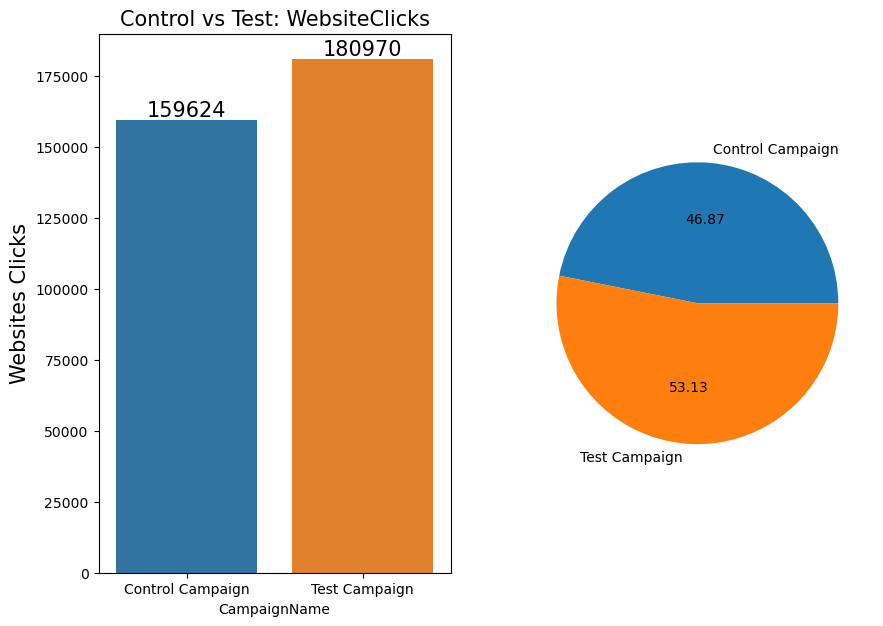

In [295]:
# Now let’s have a look at the number of website clicks from both campaigns:
group_website_clicks=ab_data[['CampaignName','WebsiteClicks']].groupby('CampaignName').sum()

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
website_clicks_plot=sns.barplot(x=group_website_clicks.index, y=group_website_clicks['WebsiteClicks'].values)
plt.ylabel('Websites Clicks', fontsize=15)
plt.title('Control vs Test: WebsiteClicks', fontsize=15)
website_clicks_plot.bar_label(website_clicks.containers[0], fontsize=15)

plt.subplot(1,2,2)
plt.pie(group_website_clicks['WebsiteClicks'], labels=['Control Campaign','Test Campaign'], autopct='%.2f')

([<matplotlib.patches.Wedge at 0x205c4e4a510>,
 [Text(-0.03898384010514809, 1.0993089921449093, 'Control Campaign'),
  Text(0.03898373718041214, -1.0993089957948352, 'Test Campaign')],
 [Text(-0.02126391278462623, 0.5996230866244959, '51.13'),
  Text(0.021263856643861163, -0.5996230886153645, '48.87')])

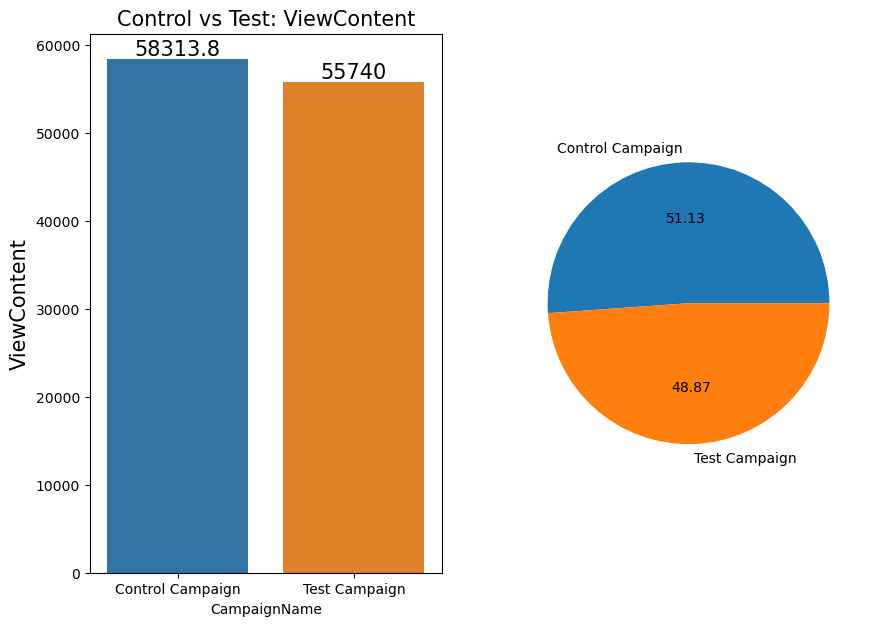

In [296]:
# Now let’s have a look at the amount of content viewed after reaching the website from both campaigns:
group_content_viewed=ab_data[['CampaignName','ViewContent']].groupby('CampaignName').sum()

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
content_viewed_plot=sns.barplot(x=group_content_viewed.index, y=group_content_viewed['ViewContent'].values)
plt.ylabel('ViewContent', fontsize=15)
plt.title('Control vs Test: ViewContent', fontsize=15)
content_viewed_plot.bar_label(content_viewed_plot.containers[0], fontsize=15)

plt.subplot(1,2,2)
plt.pie(group_content_viewed['ViewContent'], labels=['Control Campaign','Test Campaign'], autopct='%.2f')

([<matplotlib.patches.Wedge at 0x205a7918b50>,
 [Text(-0.32645252619589626, 1.0504421679180238, 'Control Campaign'),
  Text(0.32645252619589615, -1.0504421679180238, 'Test Campaign')],
 [Text(-0.1780650142886707, 0.572968455228013, '59.59'),
  Text(0.1780650142886706, -0.572968455228013, '40.41')])

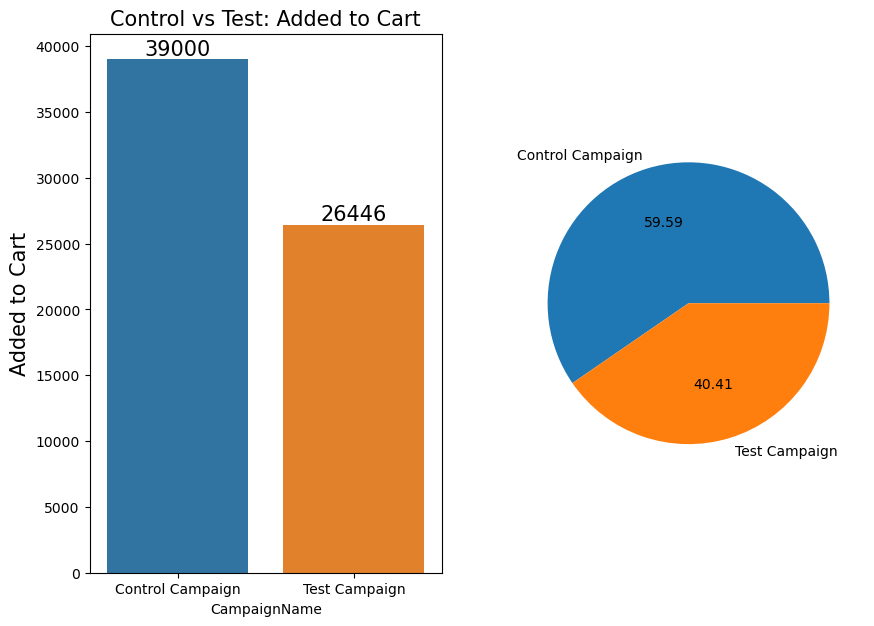

In [297]:
# Now let’s have a look at the number of Added to Cart from both campaigns:
group_added_to_cart=ab_data[['CampaignName','AddtoCart']].groupby('CampaignName').sum()

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
added_to_cart_plot=sns.barplot(x=group_added_to_cart.index, y=group_added_to_cart['AddtoCart'].values)
plt.ylabel('Added to Cart', fontsize=15)
plt.title('Control vs Test: Added to Cart', fontsize=15)
added_to_cart_plot.bar_label(added_to_cart_plot.containers[0], fontsize=15)

plt.subplot(1,2,2)
plt.pie(group_added_to_cart['AddtoCart'], labels=['Control Campaign','Test Campaign'], autopct='%.2f')

([<matplotlib.patches.Wedge at 0x205c4925010>,
 [Text(0.0976825901504408, 1.0956541934303456, 'Control Campaign'),
  Text(-0.09768248756789157, -1.095654202576045, 'Test Campaign')],
 [Text(0.053281412809331345, 0.5976295600529158, '47.17'),
  Text(-0.053281356855213576, -0.597629565041479, '52.83')])

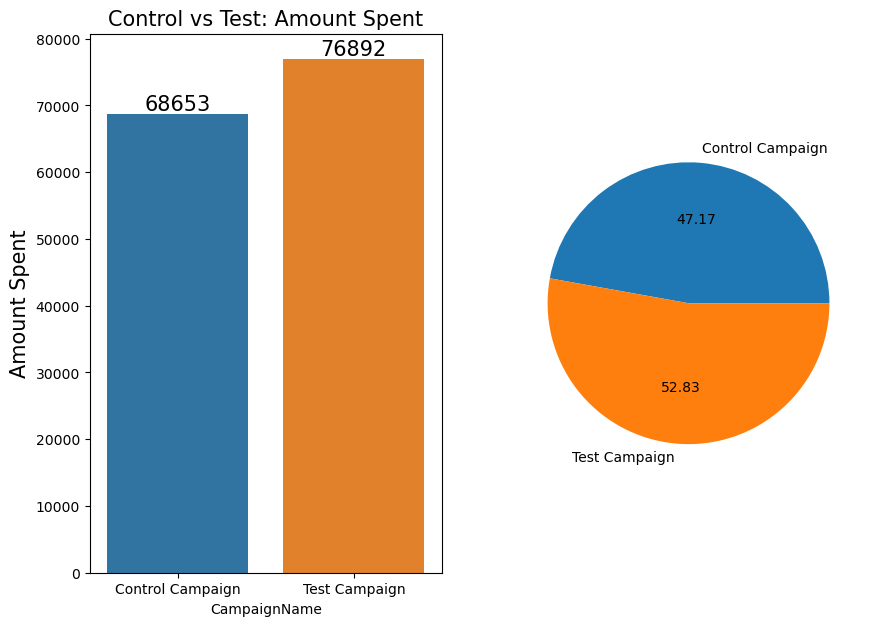

In [298]:
# Now let’s have a look at the Amount Spent from both campaigns:
group_amount_spent=ab_data[['CampaignName','Spend[USD]']].groupby('CampaignName').sum()

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
amount_spent_plot=sns.barplot(x=group_amount_spent.index, y=group_amount_spent['Spend[USD]'].values)
plt.ylabel('Amount Spent', fontsize=15)
plt.title('Control vs Test: Amount Spent', fontsize=15)
amount_spent_plot.bar_label(amount_spent_plot.containers[0], fontsize=15)

plt.subplot(1,2,2)
plt.pie(group_amount_spent['Spend[USD]'], labels=['Control Campaign','Test Campaign'], autopct='%.2f')

Text(0.5, 1.0, 'relationship between the number of website clicks and content viewed')

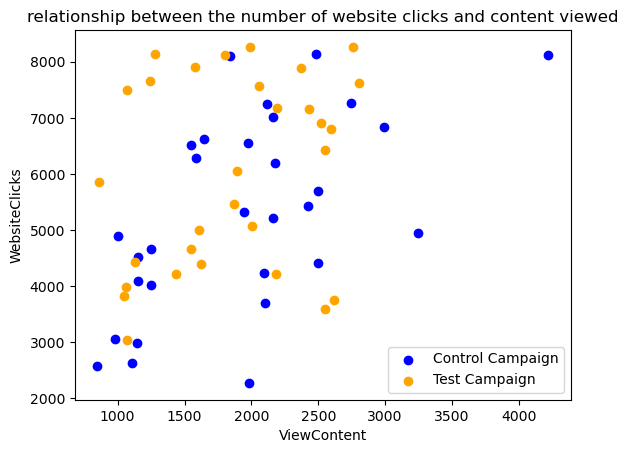

In [306]:
# look at the relationship between the number of website clicks and content viewed from both campaigns:

x1_axis=control_group['ViewContent']
y1_axis=control_group['WebsiteClicks']
x2_axis=test_group['ViewContent']
y2_axis=test_group['WebsiteClicks']

plt.scatter(x1_axis,y1_axis, c='b')
plt.scatter(x2_axis,y2_axis, c='orange')
plt.ylabel('WebsiteClicks')
plt.xlabel('ViewContent')
plt.legend(['Control Campaign','Test Campaign'])
plt.title('relationship between the number of website clicks and content viewed')

Text(0.5, 1.0, 'relationship between amount of content viewed and the number of products added to the cart')

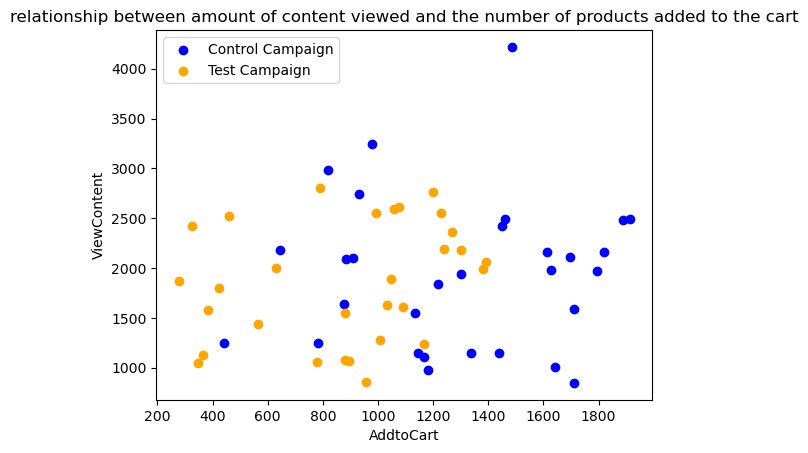

In [307]:
# the relationship between the amount of content viewed and the number of products added to the cart

x1_axis=control_group['AddtoCart']
y1_axis=control_group['ViewContent']
x2_axis=test_group['AddtoCart']
y2_axis=test_group['ViewContent']

plt.scatter(x1_axis,y1_axis, c='b')
plt.scatter(x2_axis,y2_axis, c='orange')
plt.ylabel('ViewContent')
plt.xlabel('AddtoCart')
plt.legend(['Control Campaign','Test Campaign'])
plt.title('relationship between amount of content viewed and the number of products added to the cart')

Text(0.5, 1.0, 'relationship between the number of products added to the cart and Purchases')

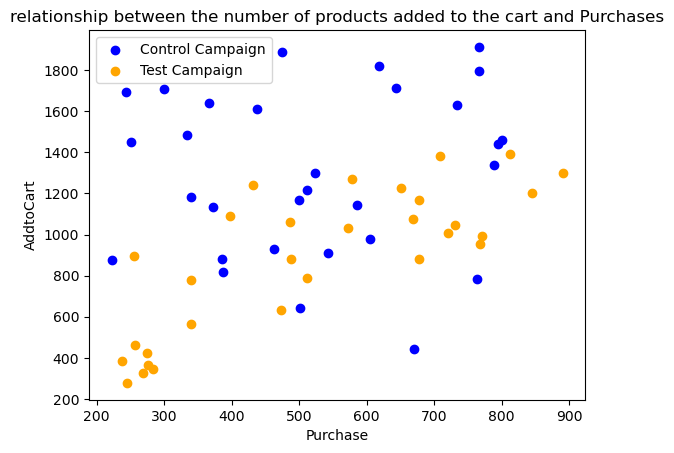

In [308]:
# the relationship between the number of products added to the cart and Purchases

x1_axis=control_group['Purchase']
y1_axis=control_group['AddtoCart']
x2_axis=test_group['Purchase']
y2_axis=test_group['AddtoCart']

plt.scatter(x1_axis,y1_axis, c='b')
plt.scatter(x2_axis,y2_axis, c='orange')
plt.ylabel('AddtoCart')
plt.xlabel('Purchase')
plt.legend(['Control Campaign','Test Campaign'])
plt.title('relationship between the number of products added to the cart and Purchases')